In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
font = {'family': 'sans-serif', 'serif': 'Helvetica',
        'size': 25}
plt.rc('font', **font)
legnd = {'fontsize': 18, 'handlelength': 1.5}
plt.rc('legend', **legnd)
mathtext = {'mathtext.default': 'regular' } 
plt.rcParams.update(mathtext)

import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle

In [2]:
meta = pd.read_csv("./UTI_bacteria.selected.tsv", sep="\t")
meta.head()

,species,strain_id,strain_numbered,community,community_completeness,special_note,strain_index,abbrev
0,Enterococcus faecalis,UTI 532,56,Comm22,incomplete,NaN,0,Ent
1,Enterococcus faecalis,NaN,2,Comm1,complete,NaN,1,Ent
2,Enterococcus faecalis,UTI 387,91,Comm19,incomplete,NaN,2,Ent
3,Enterococcus faecalis,NaN,42,Comm4,complete,NaN,3,Ent
4,Enterococcus faecalis,NaN,59,Comm5,complete,NaN,4,Ent


# Interaction matrices

In [3]:
gr_mat = np.load("GR_3.npy")
maxOD_mat = np.load("MaxOD_3.npy")

In [4]:
maxOD_mat[maxOD_mat <= 0]

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [5]:
np.where(maxOD_mat==0.0)

(array([25, 25, 25, 25, 28, 28, 28, 30]),
 array([18, 20, 26, 27, 18, 26, 27, 18]))

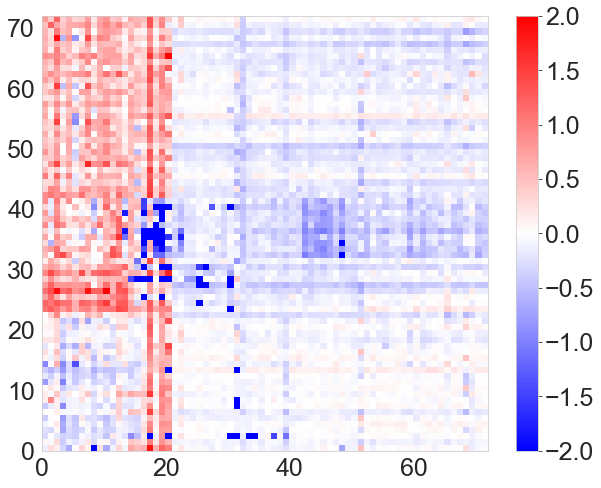

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

plot_mat = np.zeros(maxOD_mat.shape)
np.log(maxOD_mat, out=plot_mat, where = maxOD_mat != 0.0)

p = ax.pcolormesh(plot_mat, cmap="bwr", vmin=-2, vmax=2)
plt.colorbar(p)

In [7]:
def convert_to_beta(m):
    betas = np.piecewise(m, [(m < 1)&(m!=0), m >= 1, m==0.0], [lambda x: (x-1)/0.4, lambda x: x-1, lambda x: x])
    return betas

-2.49923173915
6.5954018


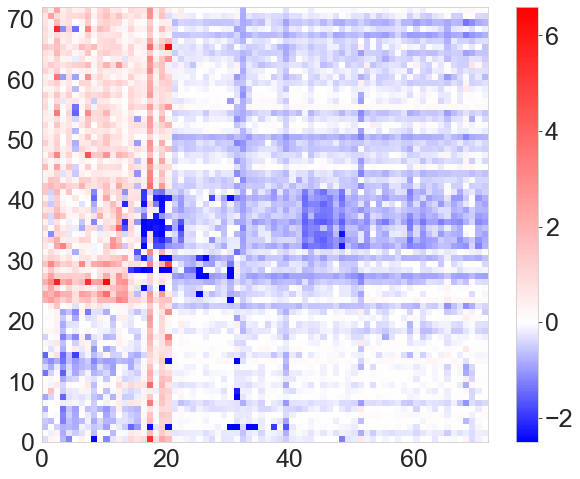

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

plot_mat = convert_to_beta(maxOD_mat)

vmin = plot_mat.min()
print(vmin)
vmax = plot_mat.max()
print(vmax)

divnorm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=0., vmax=vmax)
p = ax.pcolormesh(plot_mat, cmap="bwr", norm=divnorm)
plt.colorbar(p)

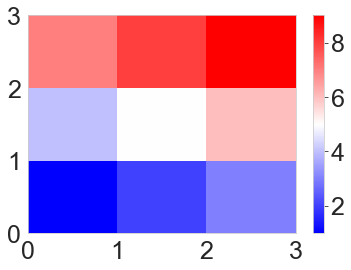

In [9]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
fig, ax = plt.subplots(1, 1)
p = ax.pcolormesh(a, cmap = 'bwr')
plt.colorbar(p)

In [10]:
A = np.array([[0, 1, 2],[2, 3, 5], [7, 8, 9]])
print(A)
np.flip(A, 0).diagonal()

[[0 1 2]
 [2 3 5]
 [7 8 9]]


array([7, 3, 2])

In [11]:
# donor and acceptor are same isolate
maxOD_mat.diagonal()

array([0.87165019, 0.94320855, 0.8229655 , 0.50117065, 0.81099681,
       0.62638972, 0.91950503, 0.92997937, 0.82688656, 1.0899776 ,
       0.77972346, 0.64956914, 1.1232255 , 0.71190615, 0.72730791,
       0.86568709, 1.2031259 , 2.9665423 , 0.97932357, 1.9502464 ,
       1.1645786 , 1.0788746 , 0.82367769, 0.89913793, 0.79590948,
       0.85197262, 0.69153622, 0.60330937, 0.82906156, 0.81542757,
       0.64450778, 0.44284772, 0.64461203, 0.81011556, 0.73062242,
       0.90619749, 0.73006587, 0.83343362, 0.82168454, 0.73735078,
       0.77909636, 0.7447548 , 0.81860789, 0.73767167, 0.90914599,
       1.1424374 , 0.93457093, 0.89441127, 0.75644147, 0.80776241,
       0.62930638, 0.6249073 , 1.0326346 , 0.80033501, 0.75596008,
       1.1782609 , 0.90422772, 0.96739794, 0.95971944, 0.78662851,
       0.86691163, 0.84166967, 0.82297432, 0.87481609, 0.8259032 ,
       0.74777579, 0.91655895, 0.68044295, 0.95470725, 0.56029376,
       0.85391832, 1.0135341 ])

# GR and maxOD in isolation

In [12]:
mono_GR_mat = np.load("mean_GR_spentHRs.selected.npy")
print(mono_GR_mat.shape)
mono_GR_mat

(1, 72)


array([[0.00673145, 0.00711291, 0.00557003, 0.00677387, 0.00739741,
        0.00916149, 0.00716943, 0.00817195, 0.0055021 , 0.0067467 ,
        0.00796911, 0.00616052, 0.00618076, 0.00536429, 0.00955308,
        0.00669282, 0.009748  , 0.0065124 , 0.00841291, 0.00754984,
        0.01114127, 0.01459118, 0.00851358, 0.01042184, 0.01080916,
        0.01290267, 0.0154012 , 0.0118894 , 0.01501086, 0.01579287,
        0.0129119 , 0.0124781 , 0.01835729, 0.01437057, 0.01618145,
        0.01738778, 0.02104793, 0.01479067, 0.01548688, 0.01480336,
        0.01429301, 0.01696462, 0.01850013, 0.01969416, 0.01802182,
        0.01912196, 0.01851633, 0.0169748 , 0.01519255, 0.01689413,
        0.01231356, 0.01473836, 0.01277178, 0.01586513, 0.01529656,
        0.01179028, 0.01402011, 0.01386865, 0.01872488, 0.01544468,
        0.01605718, 0.01577231, 0.01346734, 0.01610147, 0.0146092 ,
        0.0135089 , 0.01244156, 0.01504535, 0.0140734 , 0.0144523 ,
        0.01730215, 0.01614472]])

In [13]:
mono_maxOD_mat = np.load("mean_maxOD_spentHRs.selected.npy")
print(mono_maxOD_mat.shape)
mono_maxOD_mat

(1, 72)


array([[0.0271607 , 0.02106158, 0.0256474 , 0.03297565, 0.03344391,
        0.03185558, 0.02797179, 0.0268831 , 0.03132741, 0.03746378,
        0.02425724, 0.0219276 , 0.02212953, 0.02989886, 0.16746835,
        0.17485503, 0.21459702, 0.09243775, 0.16145837, 0.10990164,
        0.10084866, 0.40710174, 0.37708033, 0.3945769 , 0.39323422,
        0.40053425, 0.40487815, 0.36651261, 0.34955227, 0.42565941,
        0.38725623, 0.15996555, 0.23757268, 0.34516716, 0.38136207,
        0.38663135, 0.36076488, 0.39571783, 0.40454143, 0.34874992,
        0.38945183, 0.3791397 , 0.42722149, 0.38433458, 0.49680969,
        0.44433833, 0.48183804, 0.3342498 , 0.40545251, 0.37535165,
        0.38436719, 0.40835131, 0.27555889, 0.29036878, 0.3278441 ,
        0.31777304, 0.29530651, 0.27509178, 0.33386993, 0.29220002,
        0.28138583, 0.31030485, 0.29524462, 0.33335582, 0.34757626,
        0.25948364, 0.28035338, 0.3372275 , 0.31256201, 0.23378411,
        0.33778093, 0.33966661]])

# Complete communities

In [9]:
complete_communities = meta.loc[meta['community_completeness']=='complete', 'community'].unique()
complete_communities

array(['Comm1', 'Comm4', 'Comm5', 'Comm6', 'Comm8', 'Comm3', 'Comm7',
       'Comm2'], dtype=object)

In [10]:
# Pairs of indices of strains that exist within a same complete community (Enterococcus spp. excluded)
pairs = []
complete_members_indices = []
complete_members_abbrev = []

for com in complete_communities:
    com_df = meta.loc[(meta['community']==com) & (meta['abbrev'] != "Ent"), :]
    
    strain_index_list = com_df["strain_index"].to_list()
    strain_abbrev_list = com_df["abbrev"].to_list()
    
    complete_members_indices.append(strain_index_list)
    complete_members_abbrev.append(strain_abbrev_list)
    
    for i in range(len(strain_index_list)-1):
        for j in range(i+1, len(strain_index_list)):
            pairs.append((strain_index_list[i], strain_index_list[j]))

print(complete_members_indices)
print(complete_members_abbrev)
len(pairs)

[[20, 45, 58], [15, 21, 65], [30, 38, 59], [41, 48, 66], [34, 43, 61], [17, 35, 56], [19, 40, 71], [25, 57]]
[['St', 'KECS', 'Ecoli'], ['St', 'St', 'Ecoli'], ['Ps', 'Pm', 'Ecoli'], ['Pm', 'KECS', 'Ecoli'], ['Pm', 'KECS', 'Ecoli'], ['St', 'Pm', 'Ecoli'], ['St', 'Pm', 'Ecoli'], ['Ps', 'Ecoli']]


22

In [11]:
complete_communities_matOD = [maxOD_mat[l, :][:, l] for l in complete_members_indices]
complete_communities_matOD

[array([[1.1645786 , 0.9964447 , 0.92606529],
        [1.8970391 , 1.1424374 , 0.99707684],
        [2.0833749 , 1.0239697 , 0.95971944]]),
 array([[0.86568709, 0.99868812, 0.98041043],
        [0.76426949, 1.0788746 , 0.79605812],
        [1.3051397 , 0.90650588, 0.74777579]]),
 array([[0.64450778, 0.79413307, 0.70525907],
        [0.84974783, 0.82168454, 0.72807859],
        [0.89415147, 0.90605308, 0.78662851]]),
 array([[0.7447548 , 0.47002138, 0.89931828],
        [0.77416394, 0.75644147, 0.83889277],
        [0.90336721, 0.8241851 , 0.91655895]]),
 array([[0.73062242, 0.51272364, 0.56708855],
        [0.74600602, 0.73767167, 0.82777926],
        [0.92754465, 0.86675606, 0.84166967]]),
 array([[2.9665423 , 1.059812  , 0.89696632],
        [0.05175846, 0.90619749, 0.84052786],
        [2.0574071 , 1.2016149 , 0.90422772]]),
 array([[1.9502464 , 1.0269653 , 0.87387414],
        [0.06614697, 0.77909636, 0.6902185 ],
        [2.3870141 , 1.0243545 , 1.0135341 ]]),
 array([[0.85197262,

In [12]:
def find_maxmin_inter(m, f='max'):
    np.fill_diagonal(m, np.nan)
    
    if f == 'max':
        return np.nanmax(m)
        
    if f == 'min':
        return np.nanmin(m)

vmin = np.min([find_maxmin_inter(m =convert_to_beta(x), f='min') for x in complete_communities_matOD])
vmax = np.max([find_maxmin_inter(m =convert_to_beta(x), f='max') for x in complete_communities_matOD])
print(vmin, vmax)

-2.3706038475 1.3870141


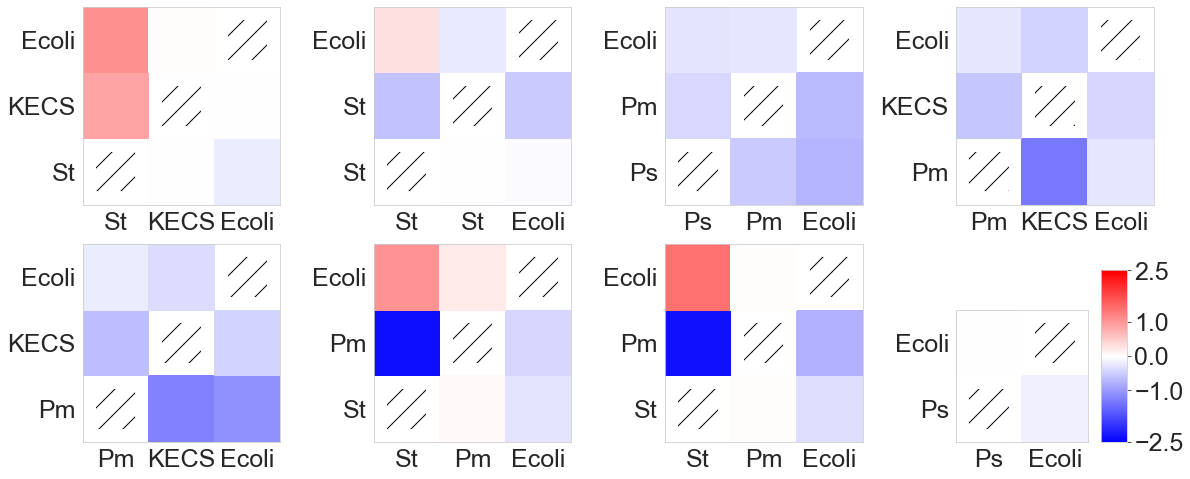

In [15]:
fig, ax = plt.subplots(2, 4, figsize=(20, 8))

s = len(complete_communities_matOD)

divnorm = mcolors.TwoSlopeNorm(vmin=-2.5, vcenter=0., vmax=2.5)

for i in range(s):
    m = complete_communities_matOD[i]
    abbrevs = complete_members_abbrev[i]
    beta_mat = convert_to_beta(m)
    
    mask = np.zeros_like(beta_mat)
    np.fill_diagonal(mask, 1)
    plot_mat = np.ma.masked_where(mask, beta_mat)
    
    m = int(i//4)
    n = i-(m*4)
    pax = ax[m, n]
    
    p = pax.pcolormesh(plot_mat, cmap="bwr", norm = divnorm)
    pax.set_aspect('equal')
    
    pax.set_xticks(np.arange(len(abbrevs))+0.5)
    pax.set_xticklabels(abbrevs)
    pax.set_yticks(np.arange(len(abbrevs))+0.5)
    pax.set_yticklabels(abbrevs)
    
    patches = [(a+0.2, a+0.2) for a in range(plot_mat.shape[0])]
    for pa in patches:
        pax.add_patch(Rectangle(pa, 0.6, 0.6, hatch='/', edgecolor='black', fill=False, lw=0))

pos = ax[1, 3].get_position().bounds
newpos = [pos[0], pos[1],pos[2]*2/3, pos[3]*2/3]
ax[1, 3].set_position(newpos)

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
axins = inset_axes(ax[1,3],
                   width="20%",  # width = 5% of parent_bbox width
                   height="130%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.10, 0., 1, 1),
                   bbox_transform=ax[1,3].transAxes,
                   borderpad=0
                   )
plt.colorbar(p, cax=axins, ticks=[-2.5, -1, 0, 1, 2.5])

# Parameters of E.coli

In [17]:
eco_ind = meta.loc[meta['abbrev']=="Ecoli", "strain_index"]

rE = mono_GR_mat[0, eco_ind]
cE = mono_maxOD_mat[0, eco_ind]

print(rE)
print(cE)

[0.01473836 0.01277178 0.01586513 0.01529656 0.01179028 0.01402011
 0.01386865 0.01872488 0.01544468 0.01605718 0.01577231 0.01346734
 0.01610147 0.0146092  0.0135089  0.01244156 0.01504535 0.0140734
 0.0144523  0.01730215 0.01614472]
[0.40835131 0.27555889 0.29036878 0.3278441  0.31777304 0.29530651
 0.27509178 0.33386993 0.29220002 0.28138583 0.31030485 0.29524462
 0.33335582 0.34757626 0.25948364 0.28035338 0.3372275  0.31256201
 0.23378411 0.33778093 0.33966661]


In [18]:
pm_ind = meta.loc[meta['abbrev']=="Pm", "strain_index"]

rZ = mono_GR_mat[0, pm_ind]
cZ = mono_maxOD_mat[0, pm_ind]

print(rZ)
print(cZ)

[0.01835729 0.01437057 0.01618145 0.01738778 0.02104793 0.01479067
 0.01548688 0.01480336 0.01429301 0.01696462]
[0.23757268 0.34516716 0.38136207 0.38663135 0.36076488 0.39571783
 0.40454143 0.34874992 0.38945183 0.3791397 ]


In [19]:
print(np.mean(rE), np.mean(cE))
print(np.mean(rZ), np.mean(cZ))

0.014833156480423281 0.3088138049206349
0.01636835652222222 0.36290988455555556
